# Stochastic Simulations - group project

## Project 4 : Variance reduction in Monte Carlo integration via function approximation

Francesca Bettinelli \
Marianna Dell'Otto \
Sophie Lequeu

In [1]:
from question2 import *
from question4 import *
from question5 import *
from question4_new import *
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Question 1
Properties of $I_{MCLS}$ and $I_{MCLS}'$ estimators. \
See LaTeX report.

### Question 2
Estimating integral :
$$I_0 = \int_0^1 \frac{1}{25 x^2+1} dx$$
#### a) Crude Monte Carlo estimator
We begin by estimating the integral *$I$* using a crude Monte Carlo estimator *$I_{MC}$*.

In [2]:
# exact value of the integral (reference)
ref_value = (1/5) * np.arctan(5)

# crude Monte Carlo estimators
N = 100
nb_samples = np.logspace(np.log10(10), np.log10(10000), num=N, dtype=int) # evenly spaced values on a logarithmic scale

CMC_estims = np.zeros(N)
for M in range(N):
    unif_samps = np.random.uniform(0, 1, nb_samples[M])
    CMC_estims[M] = crude_MC(unif_samps, f)

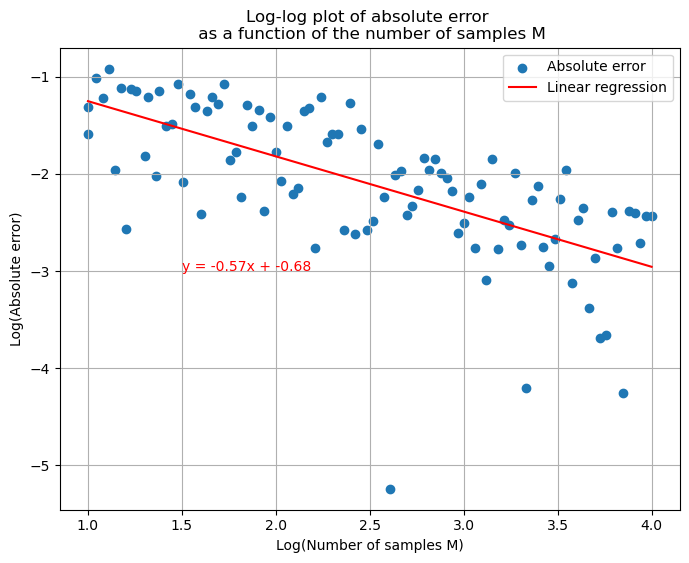

In [6]:
# plot log-log graph to see order of the error
# done here on 1 experiment for each M (number of samples)
# We note that this is quite dependent on the realisations of experiments for each M. 
loglog_graph(nb_samples, CMC_estims, ref_value)

# Cell below allows to perform a few experiments for each M and to plot the average observed error

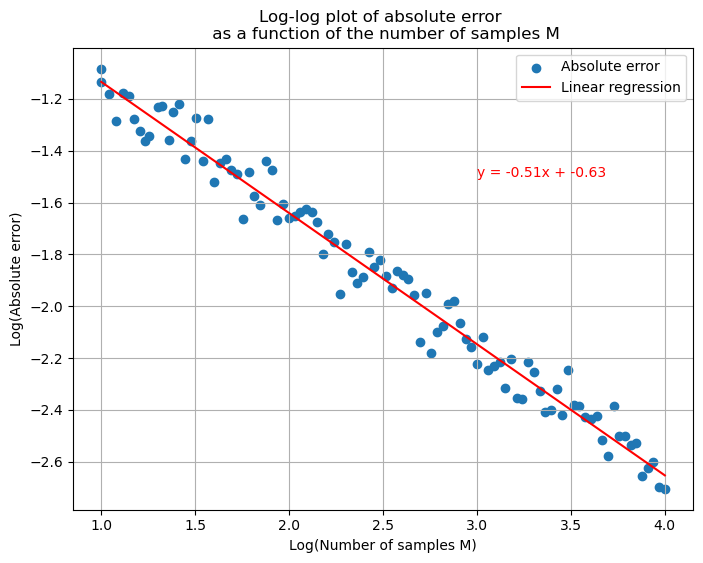

In [7]:
# averaging the absolute error, i.e. doing 'averaging' experiments for each value of M (number of samples), and 
# returning the average absolute error over these experiments.
averaging = 20
CMC_estims_av = np.zeros((N, averaging))
for M in range(N):
    CMC_estims_M = np.zeros(averaging)
    for i in range(averaging) :
        unif_samps = np.random.uniform(0, 1, nb_samples[M])
        CMC_estims_M[i] = crude_MC(unif_samps, f)
    CMC_estims_av[M][:] = CMC_estims_M

loglog_average_error_graph(nb_samples, CMC_estims_av, ref_value)

Plotting the error of the crude Monte Carlo estimator for different values of M (in log-log scale), we observe that it can be approximated by a straight line with slope $\approx 0.5$. We conclude that the error decreases approximately as the square-root of the number of samples M. This is indeed what was expected from a crude Monte Carlo estimator, since it is unbiaised, with variance in $\mathcal{O}(M)$, thus confidence interval in $\mathcal{O}(\sqrt M)$ (from the CLT).

#### b) MCLS
The aim of this second part is to implement the MCLS estimators *$I_{MCLS}$* using an expansion of the Legendre polynomials up to degree n.
We will consider the same values of $M$ (numbers of samples) as in *(a)*, and try different values of $n$ : \
    $n = 10, 20, 30, 50$, \
    $n = \lceil \sqrt M \rceil$, \
    $n = \lceil \frac{M}{2} \rceil$.

In [ ]:
ref_value = (1/5) * np.arctan(5)
N = 100
nb_samples = np.logspace(np.log10(10), np.log10(10000), num=N, dtype=int) # evenly spaced values on a logarithmic scale

trials_n = [10, 20, 30, 50, -1, -2]
nb_trials_n = len(trials_n)

# MCLS estimators
MCLS_estims = [-1 * np.ones(N) for _ in range(nb_trials_n)]
MCLS_prime_estims = [-1 * np.ones(N) for _ in range(nb_trials_n)]

# condition number of the Vandermonde matrix
MCLS_cond = [-1 * np.ones(N) for _ in range(nb_trials_n)]
MCLS_prime_cond = [-1 * np.ones(N) for _ in range(nb_trials_n)]

for M in range(N):
    for i in range(nb_trials_n):
        n = trials_n[i]

        if n == -1:
            n = np.ceil(np.sqrt(nb_samples[M])).astype(int)
            if nb_samples[M] > 5000: # too computationally expensive
                break
        if n == -2:
            n = np.ceil((nb_samples[M])/2).astype(int)
            if nb_samples[M] > 5000: # too computationally expensive
                break

        if n < nb_samples[M]:
            unif_samps = np.random.uniform(0, 1, nb_samples[M])
            MCLS_estims[i][M] = MCLS_new(unif_samps, f, n) #, MCLS_cond[i][M]
            MCLS_prime_estims[i][M] = MCLS_prime_new(unif_samps, f) #, MCLS_prime_cond[i][M]

c:\Users\Lenovo\anaconda3\lib\site-packages\numpy\polynomial\legendre.py:1412: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


c:\Users\Lenovo\OneDrive\Documents\Master\EPFL\SS\Stochastic-simulations-project\question2.py:157: RuntimeWarning: divide by zero encountered in log10
  log_errors = np.log10(absolute_errors)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

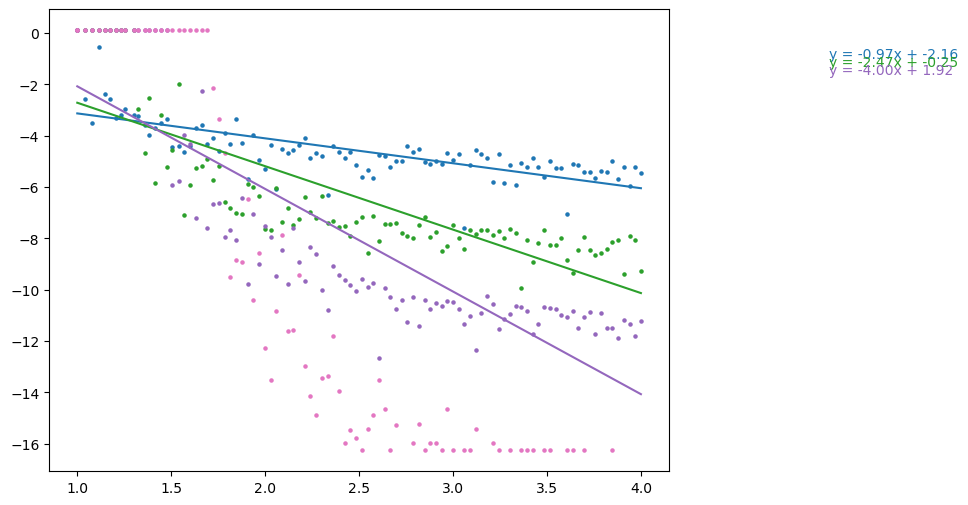

In [ ]:
# plot log-log graph to see order of the error
multiple_loglog_graph(nb_samples, MCLS_estims, ref_value)

From the plot, we can see that increasing the polynomial degree $n$ (with $n$ fixed w.r.t. the number of samples $M$) reduces the convergence constant. If we set $n = \lceil \sqrt M \rceil$, the order of convergence significantly improves. Instead, if we set $n = \lceil \frac{M}{2} \rceil$, after an initial phase affected by noise, the order seems to stabilize, again, around $\mathcal{O}(1 / \sqrt{M})$.
FROM THE REGRESSION LINES, IT SEEMS THAT INCREASING $n$ ALSO IMPROVES THE ORDER OF CONVERGENCE, MAYBE WE SHOULD AVOID DOING A REGRESSION IN THE FIRST PART OF THE PLOT WHERE THERE IS TOO MUCH NOISE???

In [ ]:
# plot log-log graph to see order of the error
multiple_loglog_graph(nb_samples, MCLS_prime_estims, ref_value)

From the plot, we can deduce that $I_{MCLS}'$ does not provide benefits in terms of order of convergence w.r.t. crude MC.

In [ ]:
multiple_cond_loglog_graph(nb_samples, MCLS_cond)

If we choose a value of $n$ too small w.r.t. $M$, the least squares problems becomes very ill-conditioned. If we set $n = \lceil \sqrt M \rceil$, the condition number of the Vandermonde matrix seems to be kept under control. In all these cases, the condition number tends to 1 as $M \to \infty$. Instead, if we set $n = \lceil \frac{M}{2} \rceil$, the condition number explodes as $M$ increases; this might be the reason behind the bad order of convergence of this estimator.

### Question 3
In this question, we propose an expression for $I_{MCLS}$ and $I_{MCLS}'$ generalized to the case of importance sampling. Samples $x^{(i)}$'s are now drawn from a distribution defined by the probability density function $g(x) = \frac{1}{w(x)}$.
We propose : 
$$I_{IS-MCLS} = \frac{\sum_{i=1}^M \left(f(x^{(i)}) - \sum_{j=0}^n c_j^{**} \phi_j(x^{(i)})\right) w(x^{(i)})}{\sum_{i=1}^M w(x^{(i)})} + c_0^{**}$$ 
and 
$$I_{IS-MCLS}' = c_0^{**}$$ 

where $\textbf{c**} = \argmin_{\textbf{c} \in \mathbb{R}^{n+1}} \sum_{i=1}^M w(x^{(i)}) \left(f(x^{(i)}) - \sum_{j=0}^n c_j \phi_j (x^{(i)}) \right)^2$

as generalized estimators IS-MCLS and IS-MCLS'. \
In the LaTeX report, we verify that these verify the properties stated in Question 1 for classical $I_{IS-MCLS}$ and $I_{IS-MCLS}'$ estimators.

### Question 4
- Propose a method to sample from the density $h(x) := \frac{1}{w(x)}$ : \
We will be using the Acceptance-rejection method. This method is the one proposed in ref [2], page 6, where we only consider the case where function f has values in $R$ (and not $R^d$). We see 2 possible variations : 

    $\diamond$ Method 1 : \
We need a bound on the true propability density function. Knowing that every $\phi_j^2$ can be bounded by $4 e p_1^{\infty}(x)$, $h(x)$ can be bounded by the same quantity. We denote $g(x) = p_1^{\infty}(x) = \frac{1}{\pi \sqrt{x(1-x)}}$ (our bound, without the multiplicative constant).
    1.  Then we sample $Y$ from this bound $g(x)$. Since this bound has a nice expression, this can be done by Inverse transform method.
    We can easily check that the cdf associated to pdf $g(x)$ is : $G(x) = \frac{2}{\pi} \arcsin \sqrt{x}$, and the inverse function is : $G^{-1}(x) = \sin^2(\frac{\pi y}{2})$.
    2.  We sample $U$ from uniform on $[0, 1]$, independant of $Y$.
    3.  If $U \leq \frac{h(Y)}{Cg(Y)} $, set $X=Y$, otherwise return to step 2.

- Implement the MCLS estimators with importance sampling.
- Test on same number of samples as in Question 2. 


In [ ]:
# 1. Test sampling from bound g, based on inverse transform method
Y_samples = sample_from_g(1000)
visualize_cdf_from_samples(Y_samples)

# Looks good, similar to expected distribution


### Expected pdf and cdf :

<div style="display: flex; flex-direction: row;">
    <img src="Arcsin_density.png" alt="Image 1" style="width: 50%; height: auto; margin-right: 10px;">
    <img src="Arcsin_cdf.png" alt="Image 2" style="width: 50%; height: auto;">
</div>

Source : Wikipedia, Arcsine distribution, https://en.wikipedia.org/wiki/Arcsine_distribution

In [ ]:
# 2. Test sampling from h = 1/w, done by acceptance-rejection method
H_samples = sample_from_h(500, 30000, 10)
visualize_cdf_from_samples(H_samples)

# Acceptance rate is low

In [ ]:
visualize_bound_g_on_h(10)

# bound seems way too loose

Method 2: composition method for a mixture density + AR method

In [ ]:
H_samples = sample_from_h_new(500, 30000, 10)
visualize_cdf_from_samples(H_samples)

In [ ]:
# C = 4 * np.e
n = 3
C = 1 / (n + 1/4) # can a similar constant be found analytically somehow?
x = np.linspace(0.01, 0.99, 100)
plt.plot(x, eval_phi_squared(x, n))
plt.plot(x, C * g(x))
print(np.all(eval_phi_squared(x, n) < C * g(x)))
plt.show

### Question 5
- Implementation of the above methods to the FitzHugh-Nagumo system of ODEs.


In [ ]:
epsilon = 0.08
I = 1.0
v0 = 0
w0 = 0
t0 = 0
T = 10
Nt = 1000
# a and b are uniformly distributed random parameters
a = np.random.uniform(0.6, 0.8)
b = np.random.uniform(0.7, 0.9)

v, w, t = solve_FHN(epsilon, I, v0, w0, t0, T, Nt, a, b)
v_scipy, w_scipy, t_scipy = solve_FHN_scipy(epsilon, I, v0, w0, t0, T, Nt, a, b)


In [ ]:
plt.plot(t, v)
plt.plot(t, w)
plt.plot(t_scipy, v_scipy)
plt.plot(t_scipy, w_scipy)
plt.legend(['v', 'w', 'v_scipy', 'w_scipy'])
plt.show()


In [ ]:
# Plot the phase space
plt.figure(figsize=(8, 6))

# Plot the integral curves 
plt.plot(v, w, 'k-', label='Integral Curves')

# Plot the cubic nullcline 
v_values = np.linspace(-2, 2, 100)
w_values_cubic = v_values - v_values**3 / 3 + I
plt.plot(v_values, w_values_cubic, 'g-', label='Cubic Nullcline')

# Plot the linear nullcline 
w_values_linear = (v_values + a) / b
plt.plot(v_values, w_values_linear, 'r-', label='Linear Nullcline')

# Set labels and title
plt.xlabel('v')
plt.ylabel('w')
plt.title('FitzHugh-Nagumo Model Phase Space')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#### Question 5.b

In [ ]:
N = 100
nb_samples = np.logspace(np.log10(10), np.log10(10000), num=N, dtype=int) # evenly spaced values on a logarithmic scale
          
n=0  #n=0,1,2,3     
a_unif = np.random.uniform(0.6, 0.8, N)
b_unif = np.random.uniform(0.7, 0.9, N)
#MCLS_estims[i][M] = MCLS_multiple(a_unif, b_unif, n, epsilon, I, v0, w0, t0, T, Nt)
MCLS_estims = MCLS_multiple(a_unif, b_unif, n, epsilon, I, v0, w0, t0, T, Nt)

In [ ]:
print(MCLS_estims)

29.38716656877463
